Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Fazendo o upload do arquivo que contêm os dados

In [2]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


Criando o DataFrame a partir do arquivo upado

In [3]:
df = pd.read_excel("AdventureWorks.xlsx")

Conferir se o nosso DataFrame foi realmente criado (visualizando as 10 primeiras linhas) 

In [4]:
df.head(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
5,2008-07-12,2008-07-20,306,384,19054,200807123CS588,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
6,2008-08-14,2008-08-21,307,384,19103,200808143CS628,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
7,2008-09-29,2008-10-09,307,384,19106,200809293CS637,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
8,2008-10-09,2008-10-19,307,384,19106,200810093CS637,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
9,2008-10-16,2008-10-27,307,384,19107,200810163CS646,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


Verificando a quantidade de linhas e colunas existente na base de dados (DataBase)

In [5]:
df.shape

(904, 16)

Verificando os tipos de dados da base de dados

In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

Qual a receita total?

In [7]:
df["Valor Venda"].sum()

5984606.1426

Criando uma coluna de custo total da venda

In [8]:
df["Custo total da venda"] = df["Custo Unitário"].mul(df["Quantidade"])  

Verificando se a nova coluna foi criada

In [9]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo total da venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


Qual o custo total das vendas?

In [10]:
df["Custo total da venda"].sum()

2486783.05

Qual o total de unidades vendidas?

In [11]:
df["Quantidade"].sum()

56907

Criando uma coluna de Lucro por venda

In [12]:
df["Lucro por venda"] = df["Valor Venda"] - df["Custo total da venda"]

Verificando se a coluna foi feita

In [13]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo total da venda,Lucro por venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


Qual o lucro total das vendas? (arredondando para ter apenas duas casas após a vírgula)

In [14]:
round(df["Lucro por venda"].sum(), 2)

3497823.09

Criando uma coluna com o tempo de envio dos produtos

In [15]:
df["Tempo de envio"] = df["Data Envio"] - df["Data Venda"]

Conferindo se a coluna foi criada

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo total da venda,Lucro por venda,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


Extraindo apenas os dias

In [17]:
df["Tempo de envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

Conferindo a mudança

In [18]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo total da venda,Lucro por venda,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


Verificando o tipo de dado da coluna "Tempo de envio"

In [19]:
df.dtypes


Data Venda              datetime64[ns]
Data Envio              datetime64[ns]
ID Loja                          int64
ID Produto                       int64
ID Cliente                       int64
No. Venda                       object
Custo Unitário                 float64
Preço Unitário                 float64
Quantidade                       int64
Valor Desconto                 float64
Valor Venda                    float64
Produto                         object
Fabricante                      object
Marca                           object
Classe                          object
Cor                             object
Custo total da venda           float64
Lucro por venda                float64
Tempo de envio                   int64
dtype: object

Qual a média de tempo de envio por marca?

In [20]:
df.groupby("Marca")["Tempo de envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo de envio, dtype: float64

Verificando se há valores faltantes

In [21]:
df.isnull().sum()

Data Venda              0
Data Envio              0
ID Loja                 0
ID Produto              0
ID Cliente              0
No. Venda               0
Custo Unitário          0
Preço Unitário          0
Quantidade              0
Valor Desconto          0
Valor Venda             0
Produto                 0
Fabricante              0
Marca                   0
Classe                  0
Cor                     0
Custo total da venda    0
Lucro por venda         0
Tempo de envio          0
dtype: int64

Agrupando as vendas por ano e por marca

In [22]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro por venda"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro por venda, dtype: float64

Configurando os numeros flutuantes que estão com base 

In [23]:
 pd.options.display.float_format = '{:20,.2f}'.format

In [24]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro por venda"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro por venda, dtype: float64

Resetando o index e trazendo o resultado em formato colunar

In [28]:
Lucro_por_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro por venda"].sum().reset_index()
Lucro_por_ano

,Data Venda,Marca,Lucro por venda
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


Qual a quantidade total de produtos vendidos agrupado por tipo de produto?

In [29]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Fazendo um gráfico do total de produtos vendidos

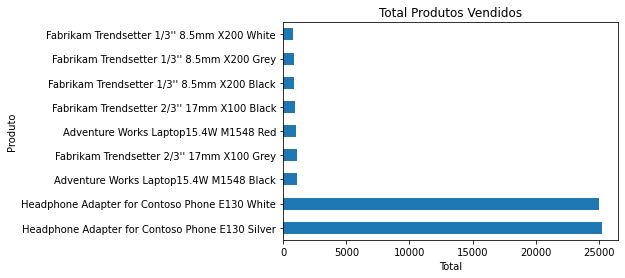

In [34]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

Fazendo um gráfico do lucro por ano

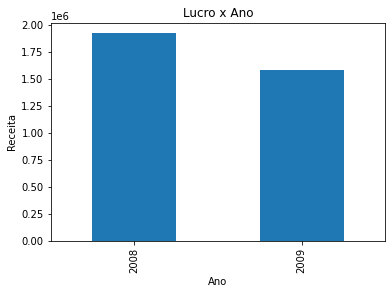

In [36]:
df.groupby(df["Data Venda"].dt.year)["Lucro por venda"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

Analisando os números do Lucro x Ano

In [37]:
df.groupby(df["Data Venda"].dt.year)["Lucro por venda"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro por venda, dtype: float64

Fazendo um filtro para todas as vendas do ano de 2009

In [38]:
df_2009 = df[df["Data Venda"].dt.year == 2009]

Analisando se foi selecionada todas as vendas de 2009

In [39]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo total da venda,Lucro por venda,Tempo de envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Fazendo um gráfico de linha de Lucro x Mês

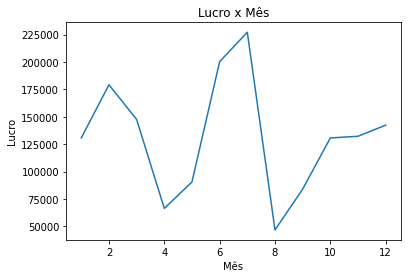

In [40]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro por venda"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

Fazendo um gráfico de barra vertical de Lucro x Marca

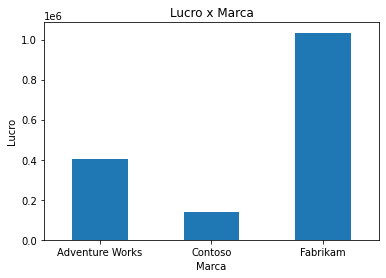

In [42]:
df_2009.groupby("Marca")["Lucro por venda"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation= 'horizontal'); #para mudar a posição do texto das barras

Fazendo um gráfico de barra vertical de Lucro x Classe

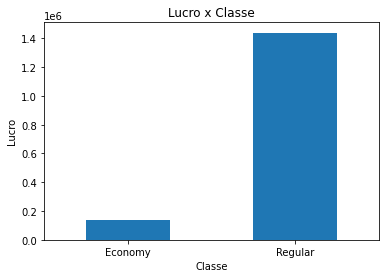

In [43]:
df_2009.groupby("Classe")["Lucro por venda"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation= 'horizontal'); 

Demonstrar algumas análises estatísticas do tempo de envio dos produtos

In [45]:
df["Tempo de envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo de envio, dtype: float64

Fazendo um gráfico Boxplot do tempo de envio

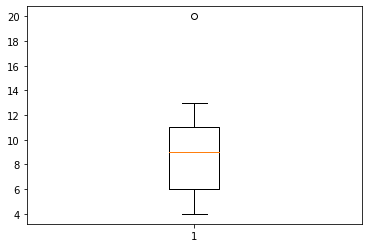

In [46]:
plt.boxplot(df["Tempo de envio"]);

Fazendo um histograma do tempo de envio

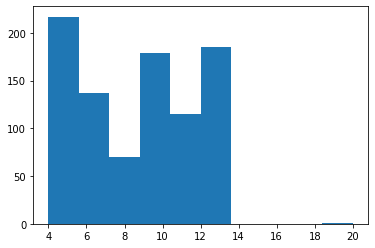

In [47]:
plt.hist(df["Tempo de envio"]);

Verificando o tempo mínimo de envio do produto

In [49]:
df["Tempo de envio"].min()

4

Verificando o tempo máximo de envio do produto

In [ ]:
df["Tempo de envio"].max()

Localizando no data frame o outlier que apareceu na análise do tempo de envio

In [50]:
df[df["Tempo de envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo total da venda,Lucro por venda,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


Salvando ao data frame tratado no formato csv

In [54]:
df.to_csv("df_análise_vendas.csv", index = False)